### Задание
Домашнее задание по дисциплине направлено на решение комплексной задачи машинного обучения. Домашнее задание включает выполнение следующих шагов:

1. Поиск и выбор набора данных для построения моделей машинного обучения. На основе выбранного набора данных студент должен построить модели машинного обучения для решения или задачи классификации, или задачи регрессии.
2. Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.
3. Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.
4. Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения. В зависимости от набора данных, порядок выполнения пунктов 2, 3, 4 может быть изменен.
5. Выбор метрик для последующей оценки качества моделей. Необходимо выбрать не менее двух метрик и обосновать выбор.
6. Выбор наиболее подходящих моделей для решения задачи классификации или регрессии. Необходимо использовать не менее трех моделей, хотя бы одна из которых должна быть ансамблевой.
7. Формирование обучающей и тестовой выборок на основе исходного набора данных.
8. Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.
9. Подбор гиперпараметров для выбранных моделей. Рекомендуется подбирать не более 1-2 гиперпараметров. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.
10. Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.
11. Формирование выводов о качестве построенных моделей на основе выбранных метрик.

### Решение

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.utils import shuffle
# !pip install gmdhpy
from gmdhpy import gmdh
%matplotlib inline 
sns.set(style="ticks")

### 1. Поиск и выбор набора данных для построения моделей машинного обучения. На основе выбранного набора данных  построение модели машинного обучения для решения или задачи регрессии.

В качестве набора данных возьмем набор с данными о песнях и их характеристиках.

Набор содержит такие колонки как:
- song_name - название песни
- song_popularity - индекс популярности песни
- song_duration_ms - длительность в мс
- acousticness - индекс акустики
- danceability - индекс танцевальности
- energy - индекс энергичности
- instrumentalness - индекс инструментальности
- key - ключ
- liveness - индекс живости
- loudness - индекс громкости
- audio_mode - режим аудио
- speechiness - индекс разговорности
- tempo - темп
- time_signature - временная метка
- audio_valence 

#### Поставим задачу предсказания популярности песни по данным характеристикам. Построим модель машинного обучения для данного набора и решим задачу регрессии.

### 2. Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.


In [4]:
data = pd.read_csv('data/song_data.csv', sep=',')
data.head()

song_name  song_popularity  song_duration_ms  \
0  Boulevard of Broken Dreams               73            262333   
1                  In The End               66            216933   
2           Seven Nation Army               76            231733   
3                  By The Way               74            216933   
4           How You Remind Me               56            223826   

   acousticness  danceability  energy  instrumentalness  key  liveness  \
0      0.005520         0.496   0.682          0.000029    8    0.0589   
1      0.010300         0.542   0.853          0.000000    3    0.1080   
2      0.008170         0.737   0.463          0.447000    0    0.2550   
3      0.026400         0.451   0.970          0.003550    0    0.1020   
4      0.000954         0.447   0.766          0.000000   10    0.1130   

   loudness  audio_mode  speechiness    tempo  time_signature  audio_valence  
0    -4.095           1       0.0294  167.060               4          0.474  
1    -6.407           0       0.0498  105.256               4          0.370  
2    -7.828           1       0.0792  123.881               4          0.324  
3    -4.938           1       0.1070  122.444               4          0.198  
4    -5.065           1       0.0313  172.011               4          0.574

In [5]:
data.shape

(18835, 15)

In [6]:
data.columns

Index(['song_name', 'song_popularity', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence'],
      dtype='object')

In [7]:
data.isnull().sum() 

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

In [9]:
data.dtypes 

song_name            object
song_popularity       int64
song_duration_ms      int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
audio_mode            int64
speechiness         float64
tempo               float64
time_signature        int64
audio_valence       float64
dtype: object

In [10]:
data.describe()

song_popularity  song_duration_ms  acousticness  danceability  \
count     18835.000000      1.883500e+04  18835.000000  18835.000000   
mean         52.991877      2.182116e+05      0.258539      0.633348   
std          21.905654      5.988754e+04      0.288719      0.156723   
min           0.000000      1.200000e+04      0.000001      0.000000   
25%          40.000000      1.843395e+05      0.024100      0.533000   
50%          56.000000      2.113060e+05      0.132000      0.645000   
75%          69.000000      2.428440e+05      0.424000      0.748000   
max         100.000000      1.799346e+06      0.996000      0.987000   

             energy  instrumentalness           key      liveness  \
count  18835.000000      18835.000000  18835.000000  18835.000000   
mean       0.644995          0.078008      5.289196      0.179650   
std        0.214101          0.221591      3.614595      0.143984   
min        0.001070          0.000000      0.000000      0.010900   
25%        0.510000          0.000000      2.000000      0.092900   
50%        0.674000          0.000011      5.000000      0.122000   
75%        0.815000          0.002570      8.000000      0.221000   
max        0.999000          0.997000     11.000000      0.986000   

           loudness    audio_mode   speechiness         tempo  time_signature  \
count  18835.000000  18835.000000  18835.000000  18835.000000    18835.000000   
mean      -7.447435      0.628139      0.102099    121.073154        3.959119   
std        3.827831      0.483314      0.104378     28.714456        0.298533   
min      -38.768000      0.000000      0.000000      0.000000        0.000000   
25%       -9.044000      0.000000      0.037800     98.368000        4.000000   
50%       -6.555000      1.000000      0.055500    120.013000        4.000000   
75%       -4.908000      1.000000      0.119000    139.931000        4.000000   
max        1.585000      1.000000      0.941000    242.318000        5.000000   

       audio_valence  
count   18835.000000  
mean        0.527967  
std         0.244632  
min         0.000000  
25%         0.335000  
50%         0.527000  
75%         0.725000  
max         0.984000

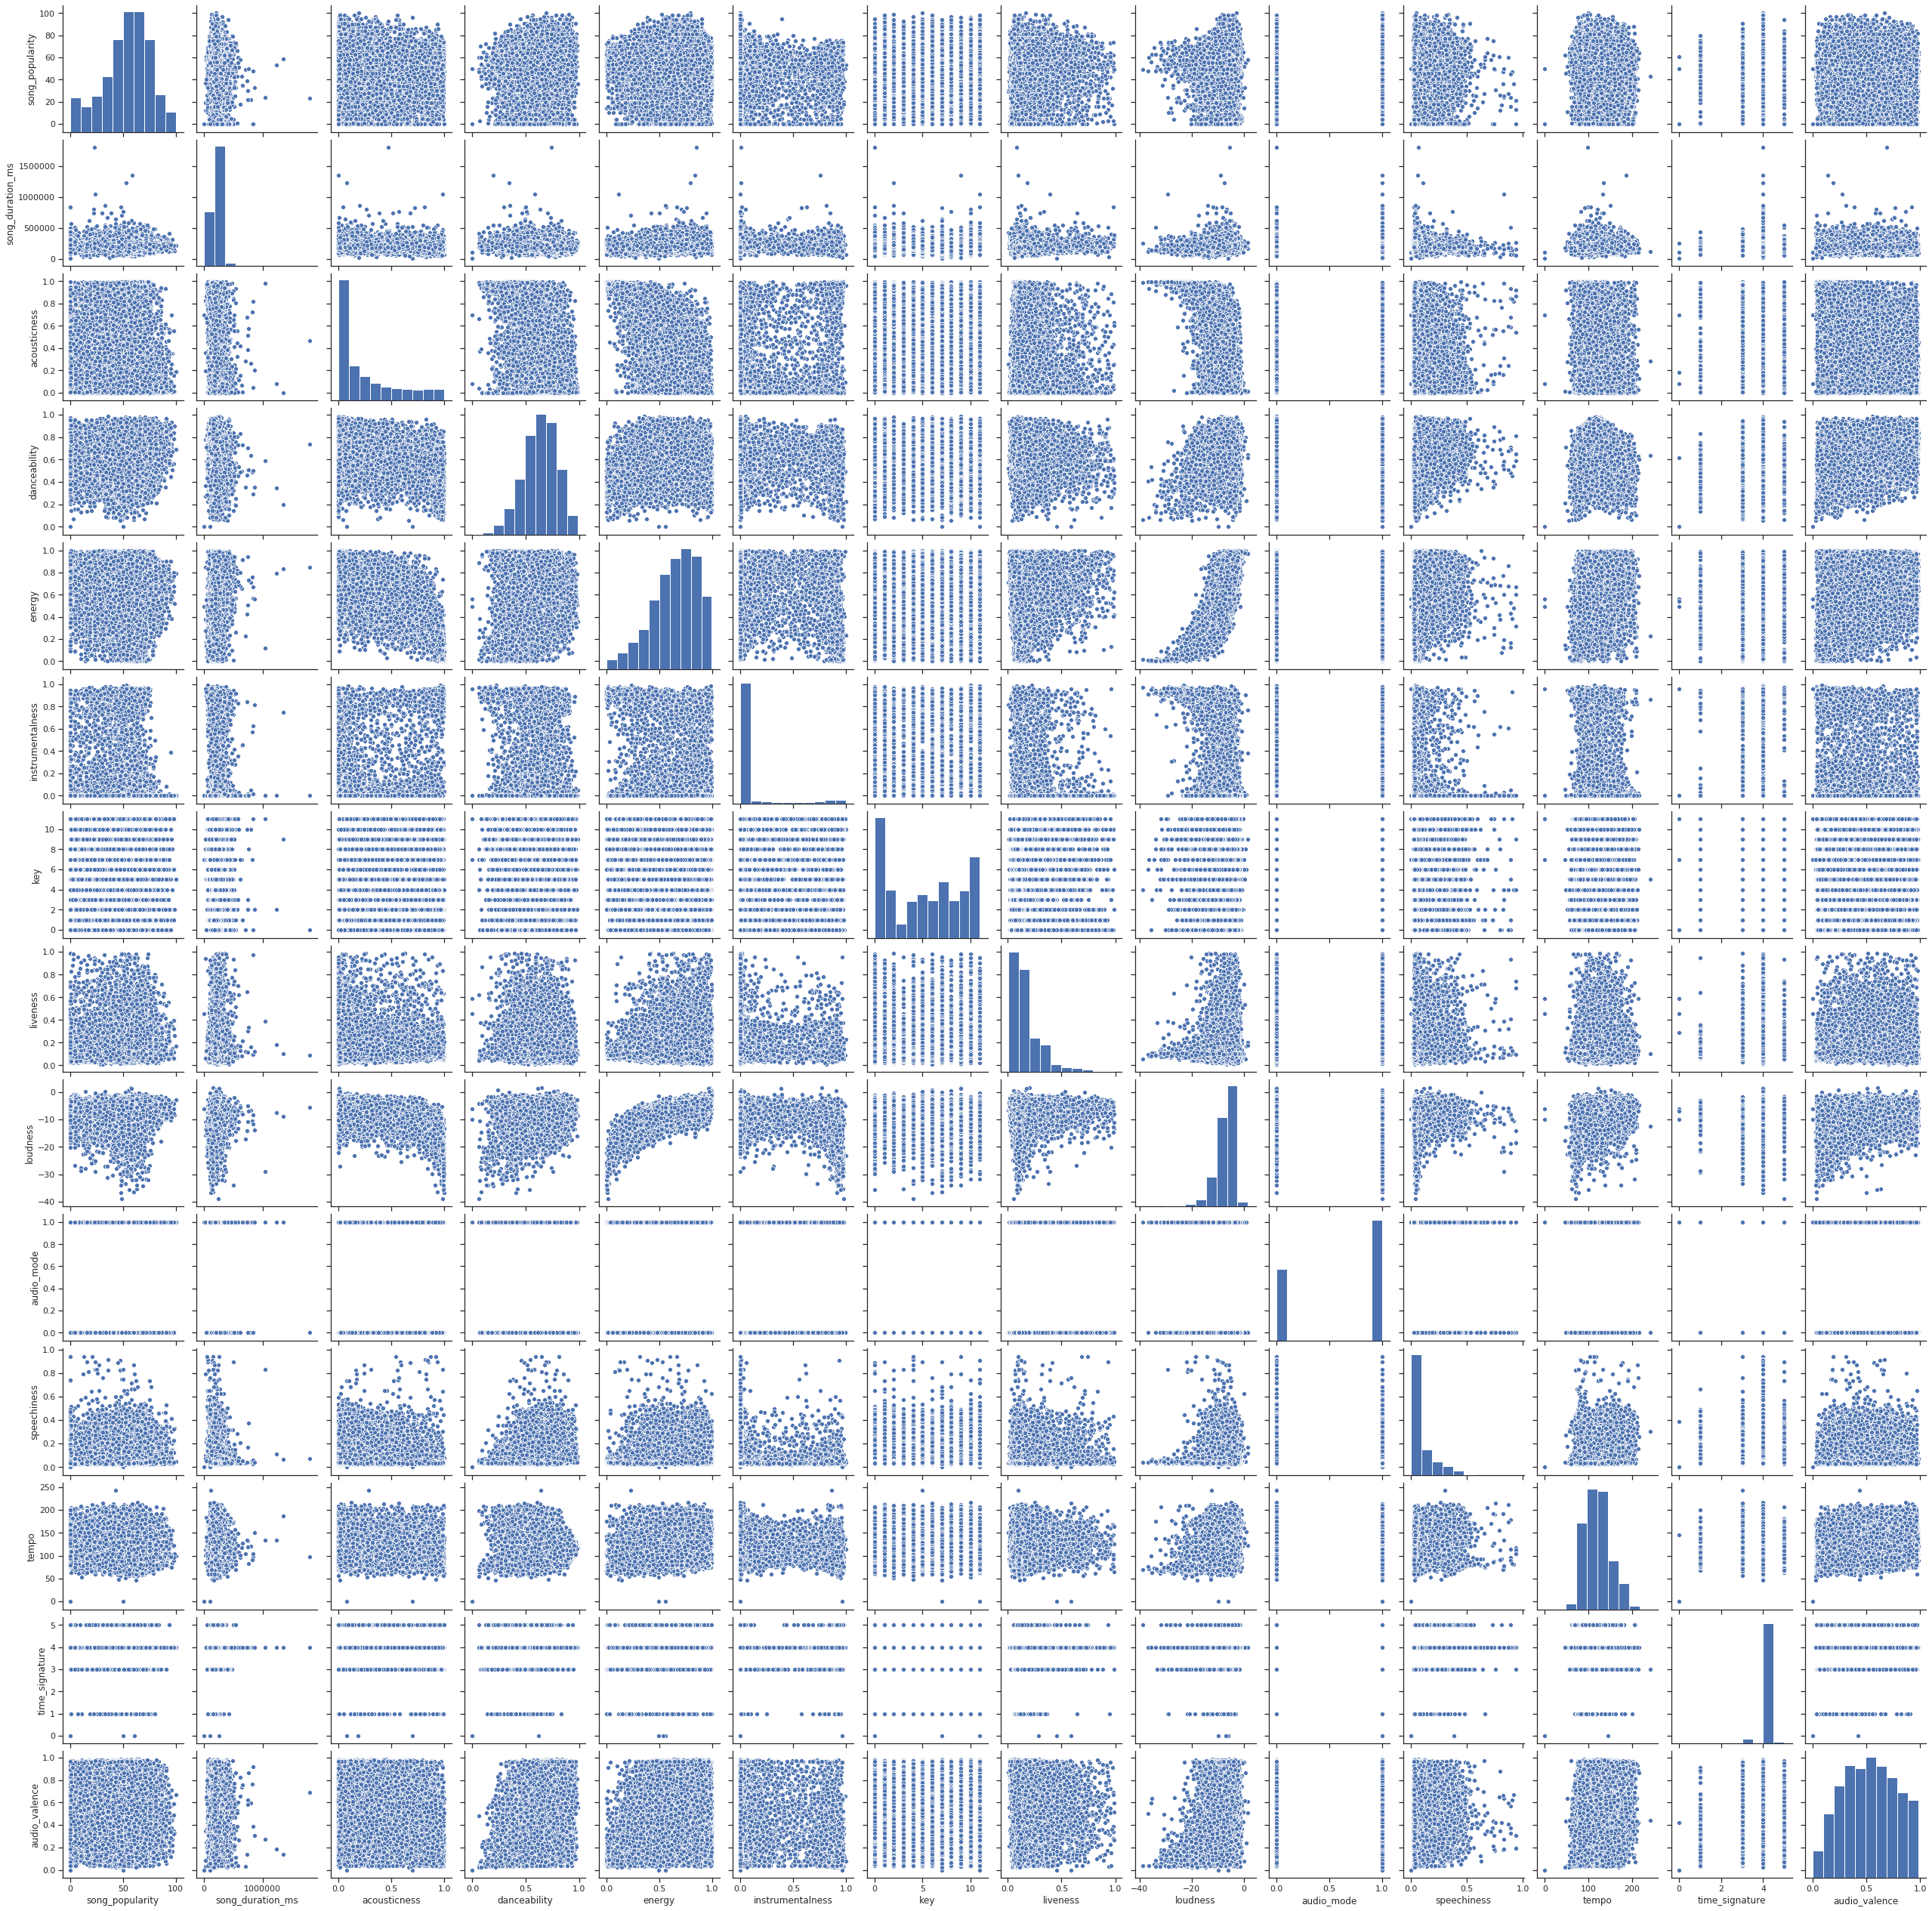

In [14]:
sns.pairplot(data)

Видим, что наиболее заметна корреляция таких характеристик как громкость и энергичность.
В остальных случаях зависимости не такие очевидные.

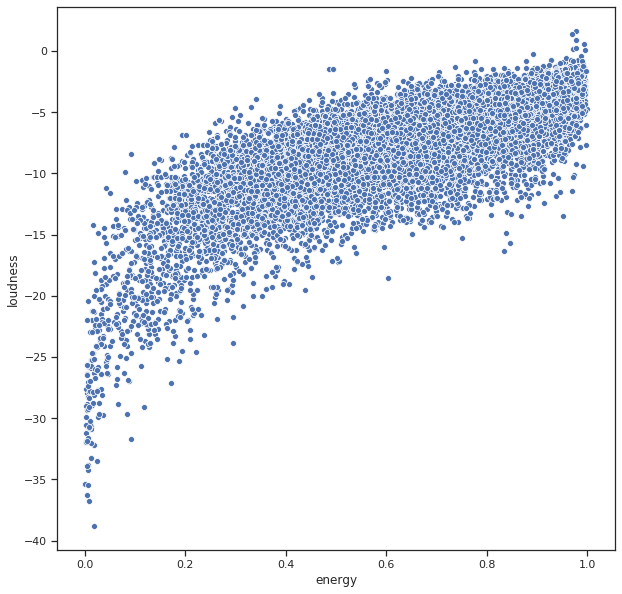

In [15]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(ax=ax, x='energy', y='loudness', data=data)

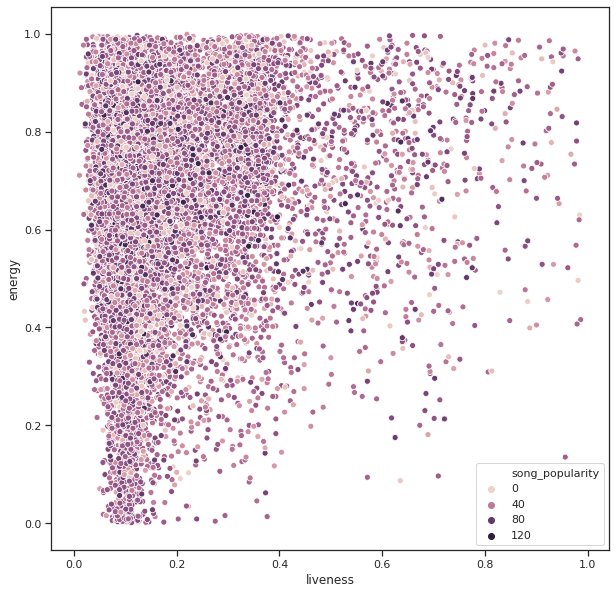

In [22]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='liveness', y='energy', data=data, hue='song_popularity')

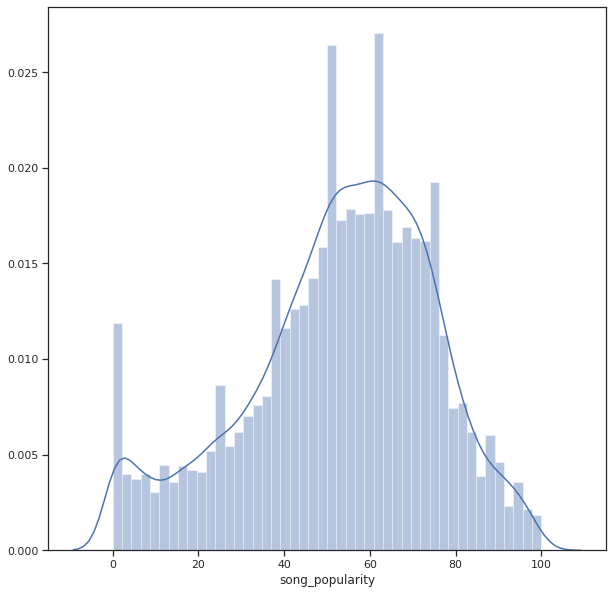

In [23]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['song_popularity'])

In [24]:
data.columns

Index(['song_name', 'song_popularity', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence'],
      dtype='object')

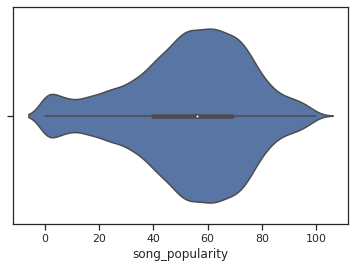

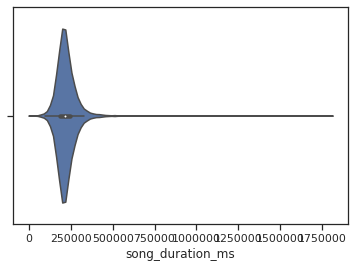

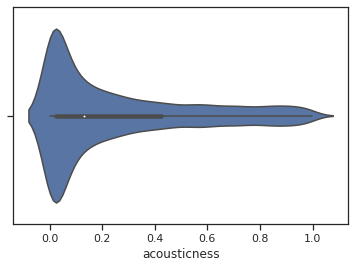

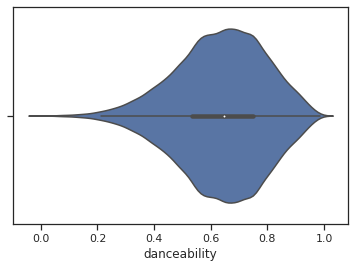

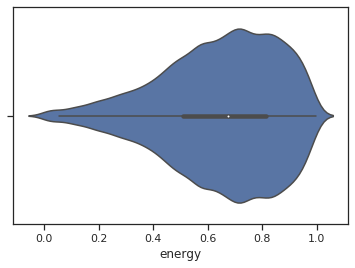

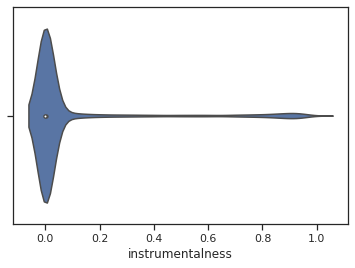

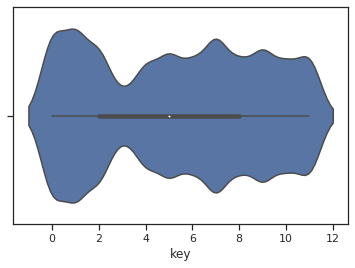

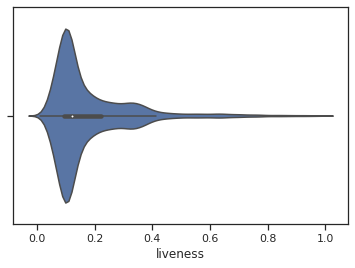

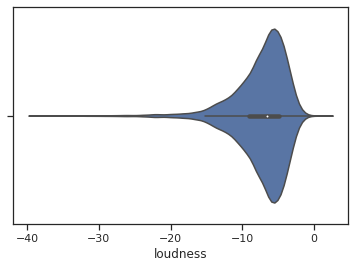

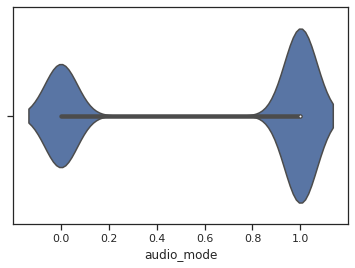

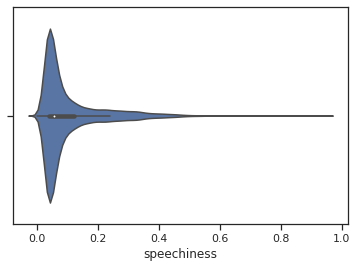

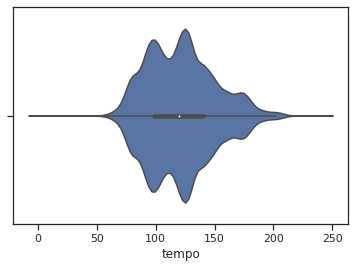

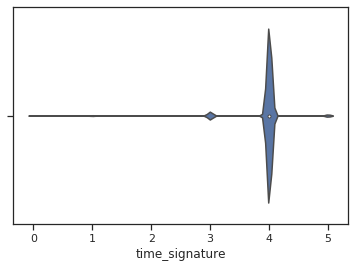

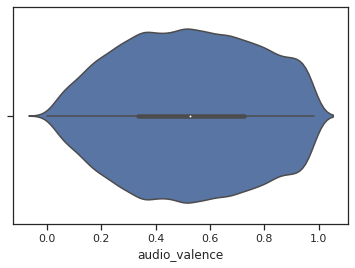

In [26]:
# Скрипичные диаграммы для числовых колонок
for col in [ 'song_popularity', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence']:
    
    sns.violinplot(x=data[col])
    plt.show()

#### Анализ и заполнение пропусков в данных. 
Поскольку в данном наборе пустых значений нет, пропустим данный пункт.

### 3. Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.

#### Кодирование категориальных признаков числовыми

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['song_name'] = le.fit_transform(data['song_name'])
data.dtypes

song_name             int64
song_popularity       int64
song_duration_ms      int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
audio_mode            int64
speechiness         float64
tempo               float64
time_signature        int64
audio_valence       float64
dtype: object

In [29]:
data.head()


song_name  song_popularity  song_duration_ms  acousticness  danceability  \
0       1561               73            262333      0.005520         0.496   
1       5541               66            216933      0.010300         0.542   
2       9638               76            231733      0.008170         0.737   
3       1760               74            216933      0.026400         0.451   
4       4988               56            223826      0.000954         0.447   

   energy  instrumentalness  key  liveness  loudness  audio_mode  speechiness  \
0   0.682          0.000029    8    0.0589    -4.095           1       0.0294   
1   0.853          0.000000    3    0.1080    -6.407           0       0.0498   
2   0.463          0.447000    0    0.2550    -7.828           1       0.0792   
3   0.970          0.003550    0    0.1020    -4.938           1       0.1070   
4   0.766          0.000000   10    0.1130    -5.065           1       0.0313   

     tempo  time_signature  audio_valence  
0  167.060               4          0.474  
1  105.256               4          0.370  
2  123.881               4          0.324  
3  122.444               4          0.198  
4  172.011               4          0.574

#### Масштабирование данных. 

In [30]:
scale_cols = ['song_popularity', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence']

In [31]:
data.columns

Index(['song_name', 'song_popularity', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence'],
      dtype='object')

In [32]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[scale_cols])

In [33]:
# Добавим масштабированные данные в набор данных
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    data[new_col_name] = sc1_data[:,i]


In [34]:
data.head()

song_name  song_popularity  song_duration_ms  acousticness  danceability  \
0       1561               73            262333      0.005520         0.496   
1       5541               66            216933      0.010300         0.542   
2       9638               76            231733      0.008170         0.737   
3       1760               74            216933      0.026400         0.451   
4       4988               56            223826      0.000954         0.447   

   energy  instrumentalness  key  liveness  loudness  ...  energy_scaled  \
0   0.682          0.000029    8    0.0589    -4.095  ...       0.682342   
1   0.853          0.000000    3    0.1080    -6.407  ...       0.853697   
2   0.463          0.447000    0    0.2550    -7.828  ...       0.462888   
3   0.970          0.003550    0    0.1020    -4.938  ...       0.970940   
4   0.766          0.000000   10    0.1130    -5.065  ...       0.766517   

   instrumentalness_scaled  key_scaled  liveness_scaled  loudness_scaled  \
0                 0.000029    0.727273         0.049226         0.859242   
1                 0.000000    0.272727         0.099580         0.801948   
2                 0.448345    0.000000         0.250333         0.766734   
3                 0.003561    0.000000         0.093426         0.838352   
4                 0.000000    0.909091         0.104707         0.835204   

   audio_mode_scaled  speechiness_scaled  tempo_scaled  time_signature_scaled  \
0                1.0            0.031243      0.689425                    0.8   
1                0.0            0.052922      0.434371                    0.8   
2                1.0            0.084166      0.511233                    0.8   
3                1.0            0.113709      0.505303                    0.8   
4                1.0            0.033262      0.709856                    0.8   

   audio_valence_scaled  
0              0.481707  
1              0.376016  
2              0.329268  
3              0.201220  
4              0.583333  

[5 rows x 29 columns]

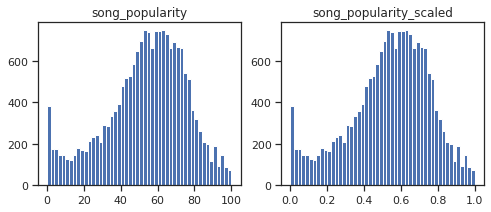

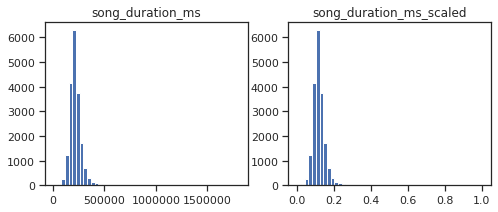

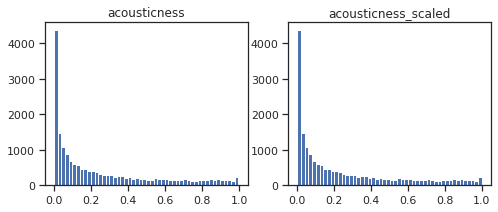

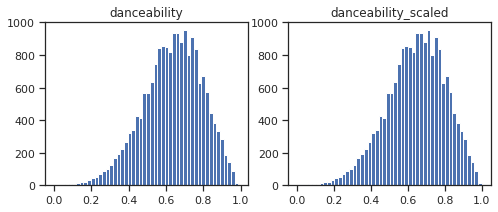

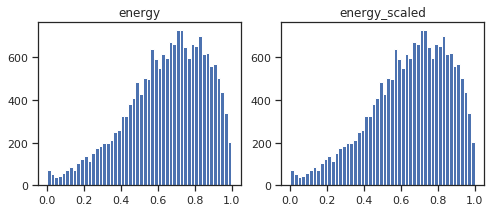

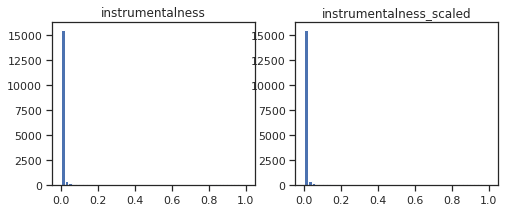

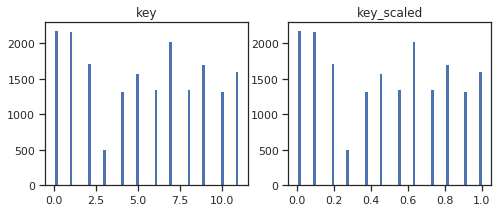

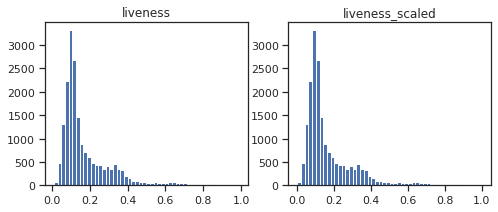

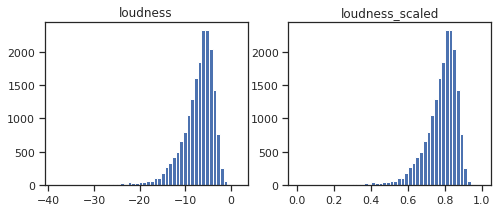

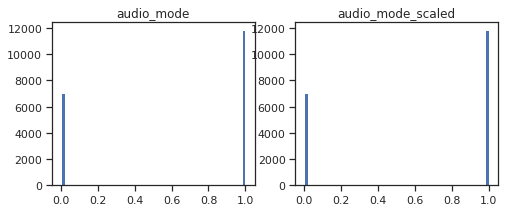

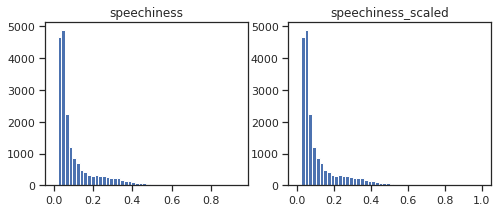

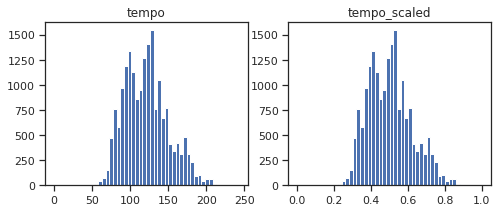

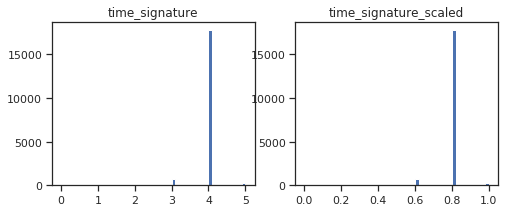

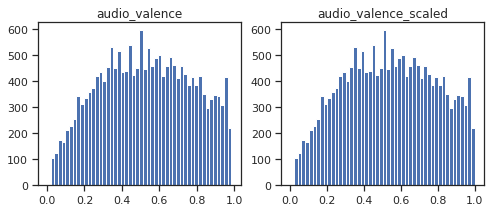

In [35]:
# Проверим, что масштабирование не повлияло на распределение данных
for col in scale_cols:
    col_scaled = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(data[col], 50)
    ax[1].hist(data[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

### 4. Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения. 

In [36]:
# Воспользуемся наличием тестовых выборок, 
# включив их в корреляционную матрицу
corr_cols_1 = scale_cols
corr_cols_1

['song_popularity',
 'song_duration_ms',
 'acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'audio_mode',
 'speechiness',
 'tempo',
 'time_signature',
 'audio_valence']

In [37]:
scale_cols_postfix = [x+'_scaled' for x in scale_cols]
corr_cols_2 = scale_cols_postfix
corr_cols_2

['song_popularity_scaled',
 'song_duration_ms_scaled',
 'acousticness_scaled',
 'danceability_scaled',
 'energy_scaled',
 'instrumentalness_scaled',
 'key_scaled',
 'liveness_scaled',
 'loudness_scaled',
 'audio_mode_scaled',
 'speechiness_scaled',
 'tempo_scaled',
 'time_signature_scaled',
 'audio_valence_scaled']

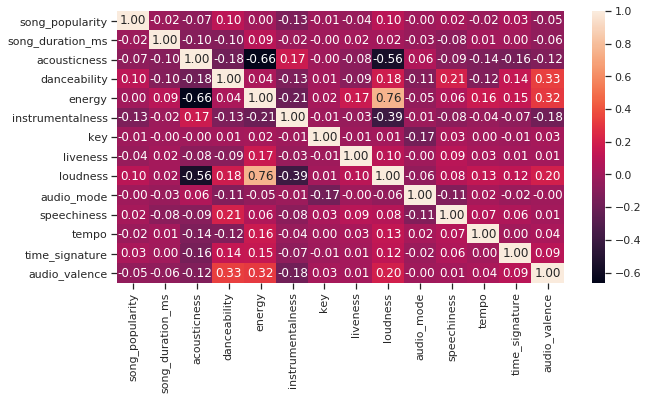

In [38]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data[corr_cols_1].corr(), annot=True, fmt='.2f')

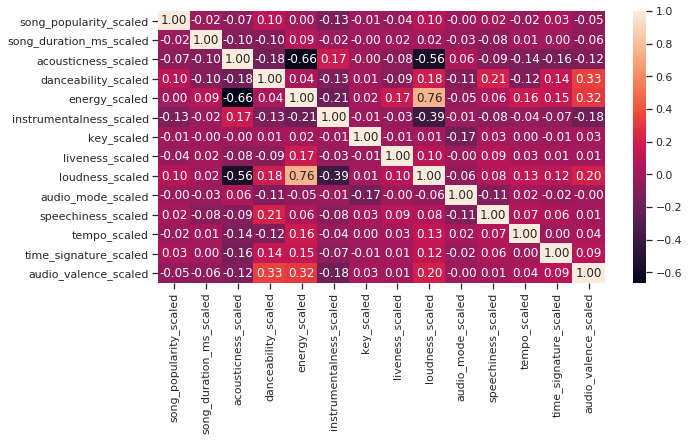

In [39]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data[corr_cols_2].corr(), annot=True, fmt='.2f')

- Видим, что популярность песни не сильно коррелирует с данными характеристиками. Наибольшее влияние на популярность оказывают такие признаки как танцевальность трека и громкость. 
- Наибольшую корреляцию видим между громкостью и энергичностью трека, как и во 2 пункте.

### 5. Выбор метрик для последующей оценки качества моделей. Необходимо выбрать не менее двух метрик и обосновать выбор.
Возьмем метрики MAE, Median Absolute Error и  R².
- MAE (Mean Absolute Error) — это среднее абсолютное значение ошибки(среднее модуля ошибки). Данная метрика удобна, так как показывает среднюю ошибку, но при этом не так чувствительна к выбросам, как, например, MSE.
- Медиана абсолютного отклонения(Median Absolute Error) - это альтернатива стандартного отклонения, но она менее чувствительна к воздействию промахов, чем среднее отклонение.
- Коэффициент детерминации, или R² покажет насколько модель соответствует или не соответствует данным.


In [41]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()    

### 6. Выбор наиболее подходящих моделей для решения задачи  регрессии.
- Возьмем модели случайный лес и дерево решений, поскольку в проведенных экспериментах в лабораторных работах случайный лес показал себя наилучшим образом. Результаты, которые удалось получить при помощи данной модели были соспоставимы с результатами самых сильных среди протестированных ансамблевых моделей. Дерево решений так же дает хорошие результаты по сравнению с, например, линейными моделями.
- В качестве ансамблевой модели возьмем лучшую модель, полученную при выполнении 6 лабораторной работы: 'TREE+RF=>LR', то есть на первом уровне у нас будут две модели: дерево и случайный лес, а на втором уровне - линейная регрессия.

### 7. Формирование обучающей и тестовой выборок на основе исходного набора данных.

In [42]:
data1 = shuffle(data)
data1

song_name  song_popularity  song_duration_ms  acousticness  \
5764       12054               50            204213        0.8570   
16725       8262               33            160693        0.0027   
5593        4559              100            214289        0.1910   
2612       12841               63            246186        0.0133   
2528        4667                7            231800        0.0193   
...          ...              ...               ...           ...   
15148         45               54            228240        0.3800   
7191       11719               72            233028        0.2000   
12766       1204               47            119360        0.0387   
3779        4837               66            307200        0.2250   
3085       12698               24            161751        0.5160   

       danceability  energy  instrumentalness  key  liveness  loudness  ...  \
5764          0.543   0.311          0.000684    5    0.0983   -10.018  ...   
16725         0.700   0.964          0.755000    7    0.1800    -6.307  ...   
5593          0.687   0.792          0.000000    5    0.1670    -2.749  ...   
2612          0.546   0.912          0.000000    4    0.5520    -4.341  ...   
2528          0.646   0.751          0.000078    8    0.1130    -4.876  ...   
...             ...     ...               ...  ...       ...       ...  ...   
15148         0.745   0.853          0.000000   10    0.2610    -3.906  ...   
7191          0.667   0.478          0.000000    2    0.0927    -5.345  ...   
12766         0.647   0.863          0.000000   10    0.2430    -2.320  ...   
3779          0.932   0.772          0.000003    0    0.1760    -3.599  ...   
3085          0.738   0.672          0.000000    7    0.1920   -10.425  ...   

       energy_scaled  instrumentalness_scaled  key_scaled  liveness_scaled  \
5764        0.310573                 0.000686    0.454545         0.089632   
16725       0.964927                 0.757272    0.636364         0.173418   
5593        0.792571                 0.000000    0.454545         0.160086   
2612        0.912820                 0.000000    0.363636         0.554917   
2528        0.751486                 0.000079    0.727273         0.104707   
...              ...                      ...         ...              ...   
15148       0.853697                 0.000000    0.909091         0.256487   
7191        0.477919                 0.000000    0.181818         0.083889   
12766       0.863718                 0.000000    0.909091         0.238027   
3779        0.772529                 0.000003    0.000000         0.169316   
3085        0.672322                 0.000000    0.636364         0.185725   

       loudness_scaled  audio_mode_scaled  speechiness_scaled  tempo_scaled  \
5764          0.712463                0.0            0.038363      0.523527   
16725         0.804426                1.0            0.050903      0.509021   
5593          0.892598                1.0            0.048034      0.412743   
2612          0.853146                1.0            0.067269      0.598606   
2528          0.839888                1.0            0.034006      0.363072   
...                ...                ...                 ...           ...   
15148         0.863926                0.0            0.260361      0.494648   
7191          0.828266                1.0            0.033581      0.468401   
12766         0.903229                0.0            0.310308      0.451275   
3779          0.871534                1.0            0.039214      0.557379   
3085          0.702377                1.0            0.464400      0.506351   

       time_signature_scaled  audio_valence_scaled  
5764                     0.8              0.136179  
16725                    0.8              0.788618  
5593                     0.8              0.681911  
2612                     0.8              0.720528  
2528                     0.8              0.454268  
...                      

In [43]:
len(data1)

18835

In [46]:
# На основе масштабированных данных выделим 
# обучающую и тестовую выборки
train_data_all = data1[:13000]
test_data_all = data1[13001:]
train_data_all.shape, test_data_all.shape

((13000, 29), (5834, 29))

In [47]:
data.columns

Index(['song_name', 'song_popularity', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence', 'song_popularity_scaled', 'song_duration_ms_scaled',
       'acousticness_scaled', 'danceability_scaled', 'energy_scaled',
       'instrumentalness_scaled', 'key_scaled', 'liveness_scaled',
       'loudness_scaled', 'audio_mode_scaled', 'speechiness_scaled',
       'tempo_scaled', 'time_signature_scaled', 'audio_valence_scaled'],
      dtype='object')

In [159]:
# Признаки для задачи регресии (опустим название)
task_regr_cols = ['song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence', 'song_duration_ms_scaled',
       'acousticness_scaled', 'danceability_scaled', 'energy_scaled',
       'instrumentalness_scaled', 'key_scaled', 'liveness_scaled',
       'loudness_scaled', 'audio_mode_scaled', 'speechiness_scaled',
       'tempo_scaled', 'time_signature_scaled', 'audio_valence_scaled']

In [160]:
# Выборки для задачи регресии
regr_X_train = train_data_all[task_regr_cols]
regr_X_test = test_data_all[task_regr_cols]
regr_Y_train = train_data_all['song_popularity']
regr_Y_test = test_data_all['song_popularity']
regr_X_train.shape, regr_X_test.shape, regr_Y_train.shape, regr_Y_test.shape

((13000, 26), (5834, 26), (13000,), (5834,))

### 8. Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.

In [284]:
# Модели
regr_models = {'Tree':DecisionTreeRegressor(max_depth=10),
               'RF':RandomForestRegressor(max_depth=10, n_estimators=30),
              }

In [285]:
# Сохранение метрик
regrMetricLogger = MetricLogger()

In [286]:
def regr_train_model(model_name, model, regrMetricLogger):
    model.fit(regr_X_train, regr_Y_train)
    Y_pred = model.predict(regr_X_test)
    
    mae = mean_absolute_error(regr_Y_test, Y_pred)
    medae = median_absolute_error(regr_Y_test, Y_pred)
    r2 = r2_score(regr_Y_test, Y_pred)

    regrMetricLogger.add('MAE', model_name, mae)
    regrMetricLogger.add('MedAE', model_name, medae)
    regrMetricLogger.add('R2', model_name, r2)    
    
    print('*****************************************************')
    print(model)
    print()
    print('MAE={}, MedAE={}, R2={}'.format(
        round(mae, 3), round(medae, 3), round(r2, 3)))
    print('*****************************************************')

In [287]:
for model_name, model in regr_models.items():
    regr_train_model(model_name, model, regrMetricLogger)

*****************************************************
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

MAE=16.609, MedAE=13.63, R2=0.034
*****************************************************
*****************************************************
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=Non

#### Ансамблевая модель

In [335]:
from heamy.estimator import Regressor
from heamy.pipeline import ModelsPipeline
from heamy.dataset import Dataset
# набор данных
dataset = Dataset(regr_X_train, regr_Y_train, regr_X_test)
# Возьмем лучшую модель: 'TREE+RF=>LR'
# модели первого уровня
model_tree = Regressor(dataset=dataset, estimator=DecisionTreeRegressor, parameters={'max_depth':10},name='tree')
model_lr = Regressor(dataset=dataset, estimator=LinearRegression, name='lr')
model_rf = Regressor(dataset=dataset, estimator=RandomForestRegressor, parameters={'max_depth':10},name='rf')

# Первый уровень - две модели: дерево и случайный лес
# Второй уровень: линейная регрессия 
pipeline = ModelsPipeline(model_tree, model_rf)
stack_ds = pipeline.stack(k=10, seed=1)
# модель второго уровня
stacker = Regressor(dataset=stack_ds, estimator=LinearRegression)
results = stacker.validate(k=10,scorer=mean_absolute_error)
print()

results = stacker.validate(k=10,scorer=median_absolute_error)



Metric: mean_absolute_error
Folds accuracy: [14.89643993242869, 15.616762658202559, 14.972788489493295, 15.222334189473978, 15.080414157836218, 14.75906546781935, 15.05850462402728, 15.044001090351392, 14.8316297901197, 15.548169842390033]
Mean accuracy: 15.103011024214249
Standard Deviation: 0.2709048887355547
Variance: 0.07338945874082325

Metric: median_absolute_error
Folds accuracy: [12.277784575440783, 13.328390040154055, 12.167663823524233, 12.946816156161724, 13.11487250948803, 12.111798154068914, 12.78946051322334, 13.216714632887722, 12.85310829872179, 12.966059307565189]
Mean accuracy: 12.777266801123577
Standard Deviation: 0.4177398537009336
Variance: 0.1745065853700774


### 9. Подбор гиперпараметров для выбранных моделей. 

#### Случайный лес

In [173]:
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [297]:
n_range = np.array(range(0,50,5))
tuned_parameters = [{'max_depth': n_range}]
tuned_parameters

[{'max_depth': array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45])}]

In [298]:
%%time
rf_gs = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=5, scoring='neg_mean_squared_error')
rf_gs.fit(regr_X_train, regr_Y_train)

/home/lisobol/tensorflow_env/my_tensorflow/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
/home/lisobol/tensorflow_env/my_tensorflow/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
/home/lisobol/tensorflow_env/my_tensorflow/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
/home/lisobol/tensorflow_env/my_tensorflow/lib/pytho

CPU times: user 15min 41s, sys: 1.08 s, total: 15min 42s
Wall time: 15min 44s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [299]:
# Лучшая модель
rf_gs.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=40, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [300]:
# Лучшее значение параметров
rf_gs.best_params_

{'max_depth': 40}

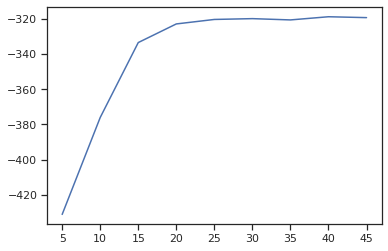

In [301]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, rf_gs.cv_results_['mean_test_score'])

#### Дерево

In [204]:
DecisionTreeRegressor().get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [292]:
n_range = np.array(range(0,50,5))

tuned_parameters = [{'max_depth': n_range}]
tuned_parameters

[{'max_depth': array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45])}]

In [293]:
%%time
dt_gs = GridSearchCV(DecisionTreeRegressor(), tuned_parameters, cv=5, scoring='neg_mean_squared_error')
dt_gs.fit(regr_X_train, regr_Y_train)

/home/lisobol/tensorflow_env/my_tensorflow/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
/home/lisobol/tensorflow_env/my_tensorflow/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
/home/lisobol/tensorflow_env/my_tensorflow/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
/home/lisobol/tensorflow_env/my_tensorflow/lib/pytho

CPU times: user 15.1 s, sys: 4.24 ms, total: 15.1 s
Wall time: 15.2 s


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_depth': array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_sc

In [294]:
# Лучшая модель
dt_gs.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [295]:
# Лучшее значение параметров
dt_gs.best_params_

{'max_depth': 5}

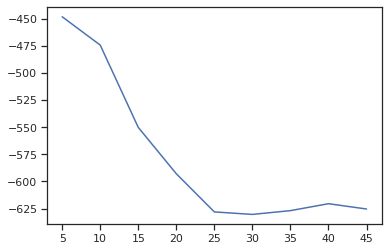

In [296]:
# Изменение качества на тестовой выборке 
plt.plot(n_range, dt_gs.cv_results_['mean_test_score'])

#### Ансамблевая модель

Поскольку параметры для случайного леса и дерева уже подобрали, то воспользуемся ими, а так же попробуем подобрать еще 2 параметра для данных моделей.
#### Decision tree

In [310]:
n_range = [0, 0.5, 1, 1.5, 2, 2.5, 3]
tuned_parameters = [{'min_impurity_split': n_range}]
tuned_parameters

[{'min_impurity_split': [0, 0.5, 1, 1.5, 2, 2.5, 3]}]

In [320]:
%%time
ens_dt_gs = GridSearchCV(DecisionTreeRegressor(), tuned_parameters, cv=5, scoring='neg_mean_squared_error')
ens_dt_gs.fit(regr_X_train, regr_Y_train)

/home/lisobol/tensorflow_env/my_tensorflow/lib/python3.7/site-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/home/lisobol/tensorflow_env/my_tensorflow/lib/python3.7/site-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/home/lisobol/tensorflow_env/my_tensorflow/lib/python3.7/site-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/home/lisobol/tensorflow_env

CPU times: user 14 s, sys: 4.05 ms, total: 14 s
Wall time: 14 s


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'min_impurity_split': [0, 0.5, 1, 1.5, 2, 2.5, 3]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,


In [321]:
# Лучшая модель
ens_dt_gs.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=1.5,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [322]:
# Лучшее значение параметров
ens_dt_gs.best_params_

{'min_impurity_split': 1.5}

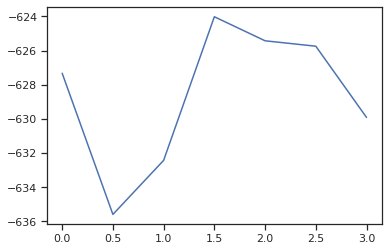

In [323]:
# Изменение качества на тестовой выборке 
plt.plot(n_range, ens_dt_gs.cv_results_['mean_test_score'])

##### Random Forest

In [324]:
n_range = [1, 5, 10, 20, 30, 40 ,50 ,60]
tuned_parameters = [{'n_estimators': n_range}]
tuned_parameters

[{'n_estimators': [1, 5, 10, 20, 30, 40, 50, 60]}]

In [326]:
%%time
ens_rf_gs = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=5, scoring='neg_mean_squared_error')
ens_rf_gs.fit(regr_X_train, regr_Y_train)

CPU times: user 4min 33s, sys: 95.4 ms, total: 4min 33s
Wall time: 4min 33s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [328]:
# Лучшая модель
ens_rf_gs.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=60, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [329]:
# Лучшее значение параметров
ens_rf_gs.best_params_

{'n_estimators': 60}

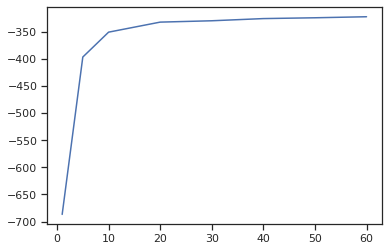

In [330]:
# Изменение качества на тестовой выборке 
plt.plot(n_range, ens_rf_gs.cv_results_['mean_test_score'])

### 10. Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.

In [289]:
regr_models_grid = {'Tree':dt_gs.best_estimator_,
                   'RF': rf_gs.best_estimator_
                   }

In [290]:
for model_name, model in regr_models_grid.items():
    regr_train_model(model_name, model, regrMetricLogger)

*****************************************************
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=14, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

MAE=16.303, MedAE=13.375, R2=0.076
*****************************************************
*****************************************************
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=61, n_jo

Удалось немного улучшить модель дерева решений и достаточно неплохо улучшить модель случайный лес

#### Ансамблевый метод

In [333]:
# # # Возьмем лучшую модель: 'TREE+RF=>LR'
# # # модели первого уровня
model_tree = Regressor(dataset=dataset,
                       estimator=DecisionTreeRegressor,
                       parameters={'min_impurity_split':1.5,
                                  'max_depth':5},name='tree')
model_lr = Regressor(dataset=dataset,
                     estimator=LinearRegression,
                     name='lr')
model_rf = Regressor(dataset=dataset,
                     estimator=RandomForestRegressor,
                     parameters={'n_estimators': 60,
                                'max_depth': 40},name='rf')

# Первый уровень - две модели: дерево и случайный лес
# Второй уровень: линейная регрессия 
pipeline = ModelsPipeline(model_tree, model_rf)
stack_ds = pipeline.stack(k=10, seed=1)
# модель второго уровня
stacker = Regressor(dataset=stack_ds, estimator=LinearRegression)


In [334]:
results = stacker.validate(k=10,scorer=mean_absolute_error)
print()

results = stacker.validate(k=10,scorer=median_absolute_error)


Metric: mean_absolute_error
Folds accuracy: [12.80562367994027, 13.255704475940108, 13.052168995181646, 13.014414170510065, 12.848374721738873, 13.016161548132631, 12.75272305242177, 13.073417650626174, 12.619076791682607, 13.289157092900757]
Mean accuracy: 12.97268221790749
Standard Deviation: 0.2042389455719696
Variance: 0.04171354688834995

Metric: median_absolute_error
Folds accuracy: [8.914441360926233, 9.787841717837992, 9.147558969487442, 9.635733648259986, 8.944208849177393, 9.359388721509454, 9.130147663254334, 9.756749380193888, 9.731591020643553, 9.74528280351102]
Mean accuracy: 9.41529441348013
Standard Deviation: 0.3379059186286033
Variance: 0.11418040984424027


Удалось неплохо улучшить модель.

### 11. Формирование выводов о качестве построенных моделей на основе выбранных метрик.

In [218]:
# Метрики качества модели
regr_metrics = regrMetricLogger.df['metric'].unique()
regr_metrics

array(['MAE', 'MedAE', 'R2'], dtype=object)

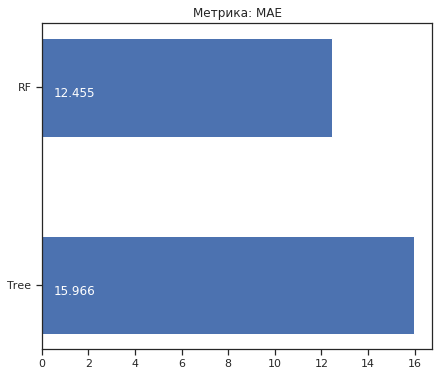

In [219]:
regrMetricLogger.plot('Метрика: ' + 'MAE', 'MAE', 
                      ascending=False, figsize=(7, 6))

Ансамбль - 12.973

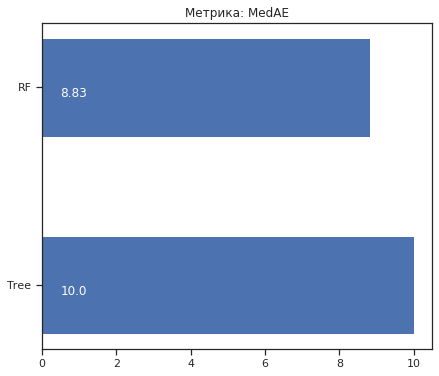

In [220]:
regrMetricLogger.plot('Метрика: ' + 'MedAE', 'MedAE', 
                      ascending=False, figsize=(7, 6))

Ансамбль - 9.415 

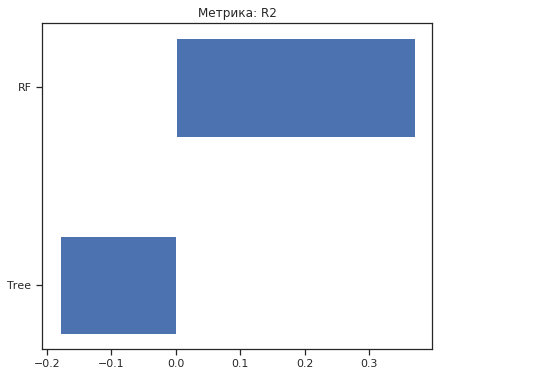

In [221]:
regrMetricLogger.plot('Метрика: ' + 'R2', 'R2',
                      ascending=True, figsize=(7, 6))


### Вывод:
Лучше всего показала себя модель случайный лес, на втором месте - ансамблевая модель, на третьем - дерево решений. Однако в другой задаче в лабораторной работе лучше показала себя ансамблевая модель, так что в дальнейшем можно использовать обе эти модели и проверять, какая будет работать лучше для конкретной задачи. 